<div class="alert alert-block alert-success">
<b>Analysis and Findings:</b> <br>
<br>- There is a strng relation between Diplome and Metier.
    
<br>- There is a strong correlation between Ville and Metier as well, therefore, These features would have positive impact on our model perforamce. <b>For instance, the more experience the applicant has, the more likely to be a Data Scientist</b>


<br>- Our Technologies feature is very important, from the density plot, we could notice that there are mutual technologies between the 4 Metier and therefore, it is a key feature in order to deferntiate between the Metier.

</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import seaborn as sns


In [2]:
dataset = pd.read_csv("../../Data/dataset_train_test.csv", sep=';')

dataset.head()

,Entreprise,Metier,Technologies,Diplome,Experience,"Ville,,,,"
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1,"Paris,,,,"
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3,"Marseille,,,,"
2,NaN,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3,"Nantes,,,,"
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,"1,5","Marseille,,,"
4,NaN,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,"Bordeaux,,,,"


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9562 entries, 0 to 9561
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Entreprise    7636 non-null   object
 1   Metier        9562 non-null   object
 2   Technologies  9562 non-null   object
 3   Diplome       9562 non-null   object
 4   Experience    8531 non-null   object
 5   Ville,,,,     9562 non-null   object
dtypes: object(6)
memory usage: 448.3+ KB


### Clean up the commas from the Ville column name + change Diplome values to lowercase

In [4]:
dataset['Ville'] = dataset['Ville,,,,']
dataset.drop(['Ville,,,,'], axis=1, inplace=True)

for index, row in dataset.iterrows():
    dataset['Diplome'][index] = row['Diplome'].lower()
# dataset.head(20)

#### Clean up the commas from the Ville Column

In [5]:
for index, row in dataset.iterrows():
    dataset['Ville'][index] = row['Ville'].split(",")[0]

dataset.head()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,master,1,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,master,3,Marseille
2,NaN,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,master,3,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,master,"1,5",Marseille
4,NaN,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,phd,NaN,Bordeaux


### - Filling our the Nan Values with the most occuring values + expand the dataset by seperating the Technologies in different rows

In [6]:
dataset = dataset.fillna(dataset.mode().iloc[0])
ext_techno_np =[]
columns_names = dataset.columns
for index, row in dataset.iterrows():
    technologies = dataset['Technologies'][index].split('/')
    for i in technologies:
        temp = row.copy()
        temp['Technologies']= i
        ext_techno_np.append(temp.values)
# dataset[['Entreprise','Metier','Diplome','Experience','Ville']]
ext_techno_df = pd.DataFrame(ext_techno_np, columns=[columns_names.values])

In [7]:
ext_techno_df.head()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab,master,1,Paris
1,Sanofi,Data scientist,Python,master,1,Paris
2,Sanofi,Data scientist,Pyspark,master,1,Paris
3,Sanofi,Data scientist,Scikit-learn,master,1,Paris
4,Sanofi,Data scientist,Tensorflow,master,1,Paris


### in Technologies, there was '' value, I remove it here

In [8]:
for val in ['']:
    ext_techno_df.replace(val, ext_techno_df.mode().iloc[0], inplace=True)
ext_techno_df.head()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab,master,1,Paris
1,Sanofi,Data scientist,Python,master,1,Paris
2,Sanofi,Data scientist,Pyspark,master,1,Paris
3,Sanofi,Data scientist,Scikit-learn,master,1,Paris
4,Sanofi,Data scientist,Tensorflow,master,1,Paris


### - Split my features and my target (X & Y)

In [23]:
# target = ext_techno_df[['Metier']]
# features = ext_techno_df.sort_index(axis=1).drop(['Metier'], axis=1)
ext_techno_df[['Experience']].value_counts().index.values

array([('1,5',), ('2',), ('1',), ('0,5',), ('2,5',), ('3,5',), ('0',),
       ('3',), ('4',), ('5',), ('6',), ('7',), ('8',), ('11',), ('9',),
       ('13',), ('15',), ('12',), ('17',), ('21',), ('10',)], dtype=object)

In [10]:
ext_techno_df[['Metier']].value_counts().index.values

array([('Data scientist',), ('Data engineer',), ('Data architecte',),
       ('Lead data scientist',)], dtype=object)

### - Encode the target feature using Label Encoder + Encoding Diplome using Ordinal encoder (because I want them to be ordinal and give more value to the candidate who has more experience)

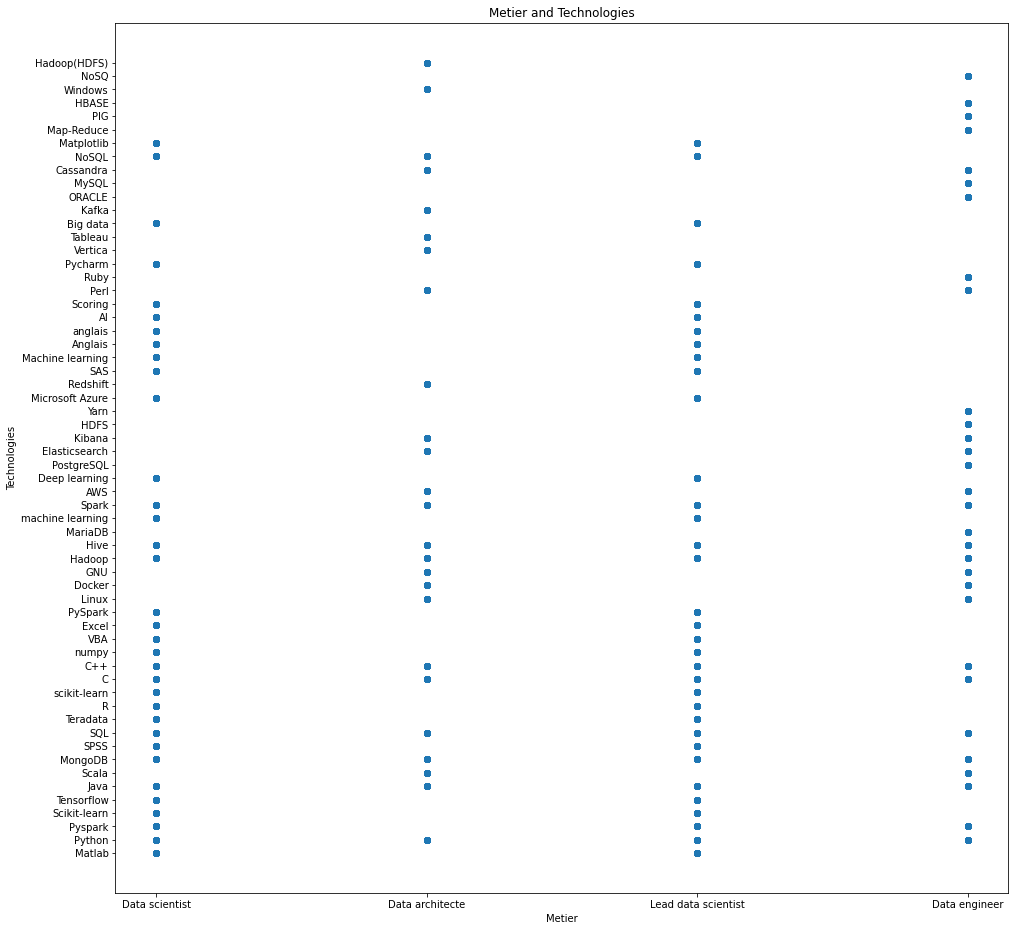

In [11]:
plt.figure(figsize=(16,16))
plt.scatter(ext_techno_df['Metier'].values.reshape(-1,), ext_techno_df['Technologies'].values.reshape(-1,))
plt.title('Metier and Technologies')
plt.xlabel('Metier')
plt.ylabel('Technologies')
plt.show()

In [12]:
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(ext_techno_df['Metier'].values.reshape(-1,))
# # print(y[:10])
# ext_techno_df['Metier'] = y
# y.head(20)


Ordinal_Encoder = OrdinalEncoder()
ord_features = ext_techno_df[['Diplome', 'Technologies', 'Ville']]
ord_data = Ordinal_Encoder.fit_transform(ord_features)
ext_techno_df['Diplome'] = ord_data[:,0]
ext_techno_df['Technologies'] = ord_data[:,1]
ext_techno_df['Ville'] = ord_data[:,2]
ext_techno_df.head()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,24.0,2.0,1,8.0
1,Sanofi,Data scientist,38.0,2.0,1,8.0
2,Sanofi,Data scientist,37.0,2.0,1,8.0
3,Sanofi,Data scientist,46.0,2.0,1,8.0
4,Sanofi,Data scientist,50.0,2.0,1,8.0


In [13]:
# ext_techno_df[['Ville']].value_counts().index.values
# ext_techno_df[['Technologies']].value_counts().index.values
# ext_techno_df.head()

<AxesSubplot:ylabel='Density'>

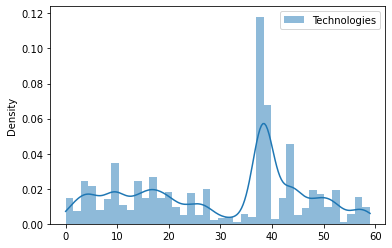

In [14]:
sns.histplot(ext_techno_df['Technologies'], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)

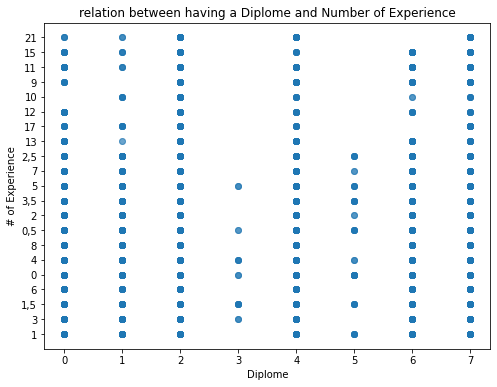

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(ext_techno_df['Diplome'].values.reshape(-1,), ext_techno_df['Experience'].values.reshape(-1,), alpha=0.3)
plt.title('relation between having a Diplome and Number of Experience')
plt.xlabel('Diplome')
plt.ylabel('# of Experience')
plt.show()

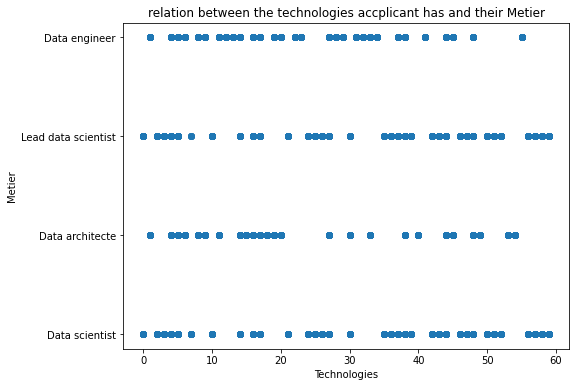

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(ext_techno_df['Technologies'].values.reshape(-1,), ext_techno_df['Metier'].values.reshape(-1,), alpha=0.3)
plt.title('relation between the technologies accplicant has and their Metier')
plt.xlabel('Technologies')
plt.ylabel('Metier')
plt.show()

<Figure size 720x576 with 0 Axes>

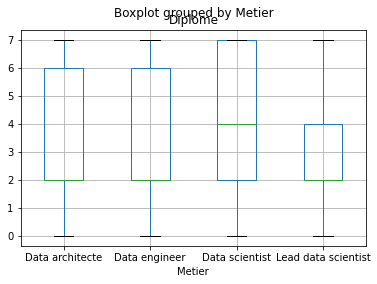

In [25]:
dff = pd.DataFrame()
dff['Diplome'] = ext_techno_df['Diplome']
dff['Metier'] = ext_techno_df['Metier']

plt.figure(figsize=(10,8))
dff.boxplot(column=['Diplome'], by='Metier')
plt.show()

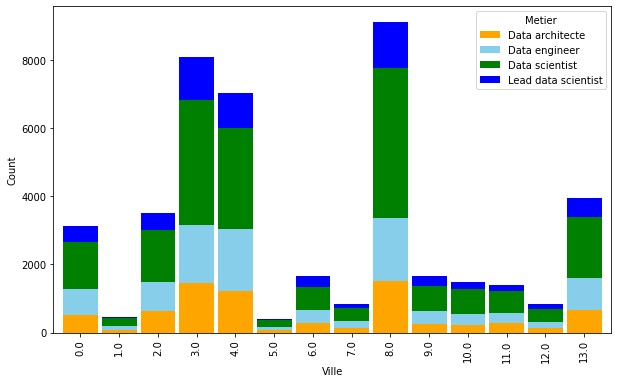

In [18]:
dff = pd.DataFrame()
dff['Ville'] = ext_techno_df[['Ville']]
dff['Metier'] = ext_techno_df[['Metier']]

df_plot = dff.groupby(['Ville','Metier']).size().unstack().plot(kind='bar', stacked=True, color=['orange', 'skyblue', 'green', 'blue'], width=0.9,figsize=(10,6))
plt.ylabel('Count')
plt.show()

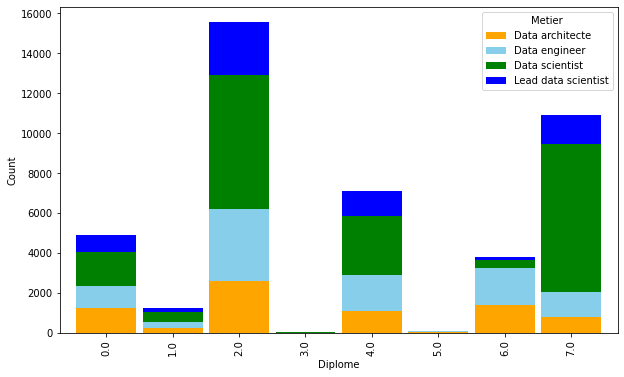

In [19]:
dff = pd.DataFrame()
dff['Diplome'] = ext_techno_df[['Diplome']]
dff['Metier'] = ext_techno_df[['Metier']]

df_plot = dff.groupby(['Diplome','Metier']).size().unstack().plot(kind='bar', stacked=True, color=['orange', 'skyblue', 'green', 'blue'], width=0.9,figsize=(10,6))
plt.ylabel('Count')
plt.show()


In [20]:
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 0)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.20, random_state = 0)

# dataset.head()